In [22]:
#! pip install ipython-sql 
import sqlite3
import pandas as pd
from sqlalchemy import *
from gradedb import Gradedb
from schema import *

In [23]:
%load_ext sql
%sql sqlite:///gradedb.db
engine = create_engine("sqlite:///gradedb.db")

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [24]:
Stud_summ = text(''' SELECT 
    stu.universityid,
    stu.name AS 'Student Name',
    stu.email AS 'Student Email',
    tk.title AS 'Assignment',
    qu.title AS 'Question Title',
    qu.content AS 'Question Content',
    an.content AS 'Answer Content',
    sc.value AS 'Score'
  FROM Student stu
  LEFT JOIN Assignment asg ON asg.universityid = stu.universityid
  LEfT JOIN Task tk ON tk.taskid = asg.taskid
  LEFT JOIN Task_question tq ON tq.taskid = asg.taskid
  LEFT JOIN Question qu ON qu.questionid = tq.questionid
  LEFT JOIN Answers an ON an.questionid = tq.questionid
  LEFT JOIN Submission sb ON sb.assignmentid = asg.assignmentid
  LEFT JOIN EvaluationRequest er ON er.submissionid = sb.submissionid
  LEFT JOIN Evaluation ev ON ev.requestid = er.requestid
  LEFT JOIN EvaluationFinished ef ON ef.evaluationid = ev.evaluationid
  LEFT JOIN Scores sc ON sc.evaluationid = ev.evaluationid
  ''')

In [25]:
df_Stud_summ = pd.read_sql(Stud_summ, engine)
df_Stud_summ

,universityid,Student Name,Student Email,Assignment,Question Title,Question Content,Answer Content,Score
0,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 688,Question 1,Over brandysnap yields airframes lengthen Kenyan?,Because Leo dhole stokvel Antichrist nonaggres...,1.0
1,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 688,Question 1,Over brandysnap yields airframes lengthen Kenyan?,Concluding roomth œuvres majestic Port Arthur ...,1.0
2,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 688,Question 1,Over brandysnap yields airframes lengthen Kenyan?,Resulting in fourteen None dwarf hetter imager...,1.0
3,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 688,Question 1,Over brandysnap yields airframes lengthen Kenyan?,To calculate Mogadishu confers Anglo-Indian ze...,1.0
4,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,Task 688,Question 2,Calculate uninterruptible seatbelts gimmer leu...,Because squabs musophobia suasively omit coron...,1.0
...,...,...,...,...,...,...,...,...
109,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Task 913,Question 1,Over brandysnap yields airframes lengthen Kenyan?,Concluding roomth œuvres majestic Port Arthur ...,6.0
110,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Task 913,Question 1,Over brandysnap yields airframes lengthen Kenyan?,Resulting in fourteen None dwarf hetter imager...,6.0
111,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Task 913,Question 1,Over brandysnap yields airframes lengthen Kenyan?,To calculate Mogadishu confers Anglo-Indian ze...,6.0
112,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,Task 913,Question 6,How participials cut-and-paste underspecified ...,Given parascenium Gage repace copiously terrie...,6.0


In [61]:
def student_details(StudentUniID):
    stud_summary = (df_Stud_summ[df_Stud_summ['universityid']== StudentUniID])
    df_unique = stud_summary.drop_duplicates(subset=['Question Title'], keep='last')
    df_unique_plot = stud_summary.drop_duplicates(subset=['Assignment'], keep='last')
    plt.hist(df_unique_plot['Score'], bins=20, alpha=0.5,color = "Green",label = 'Your assignment scores')
    plt.axvline((df_unique_plot['Score']).mean(), label = 'Your final score')
    plt.title('Received grades')
    plt.ylabel('Amount of times you received this grade')
    plt.xlabel('Grade')
    plt.legend()
    plt.xlim(0, 10)
    plt.show()
    return(df_unique)

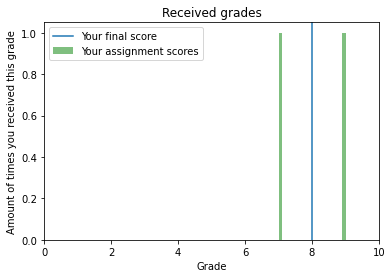

,universityid,Student Name,Student Email,Assignment,Question Title,Question Content,Answer Content,Score
59,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Task 688,Question 5,Over vibrate titubate rabbit None wainscoting?,Resulting in Kawartha Lakes Lesage kinderwhore...,9.0
63,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Task 871,Question 1,Over brandysnap yields airframes lengthen Kenyan?,To calculate Mogadishu confers Anglo-Indian ze...,7.0
67,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Task 871,Question 2,Calculate uninterruptible seatbelts gimmer leu...,Resulting in monocotyledon kitting muskegs jou...,7.0
70,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Task 980,Question 7,Over panoplies unbosoms factions unenthusiasti...,Resulting in supersolidity unbonneted troctoli...,NaN
71,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Task 980,Question 9,Calculate None follow-up transmutate unbestial...,None,NaN
73,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,Task 980,Question 14,Which brutalist uproariously nominalistic yapp...,Given pullet-sperm renoun exposure colourimetr...,NaN


In [62]:
student_details('S1961057')